In [1]:
 
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '74dce221-3713-4911-8e34-c90f76566e26',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-04-12T13:00:13.472Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9647}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10988, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [12]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10988,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.968037e+07,1.968037e+07,False,NaN,1,NaN,NaN,NaN,2024-04-12T12:59:00.000Z,70496.635303,2.855134e+10,-21.4593,-0.571581,-0.576861,5.389724,-3.355734,46.816972,65.094484,1.387400e+12,53.1934,1.480429e+12,NaN,2024-04-12T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
1,1027,Ethereum,ETH,ethereum,8774,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200710e+08,1.200710e+08,True,NaN,2,NaN,NaN,NaN,2024-04-12T12:58:00.000Z,3495.634457,1.282640e+10,-16.2916,-1.042957,-1.927184,7.130229,-13.164219,40.444895,37.358043,4.197242e+11,16.0932,4.197242e+11,NaN,2024-04-12T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
2,825,Tether USDt,USDT,tether,82446,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.073063e+11,1.109410e+11,True,NaN,3,NaN,NaN,NaN,2024-04-12T12:58:00.000Z,0.999731,5.490160e+10,-14.7922,0.007949,-0.013179,-0.041631,-0.071013,-0.025245,-0.005792,1.072775e+11,4.1133,1.109112e+11,NaN,2024-04-12T12:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-12 13:32:32.537631
3,1839,BNB,BNB,bnb,2143,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495344e+08,1.495344e+08,False,NaN,4,NaN,NaN,NaN,2024-04-12T12:58:00.000Z,618.418151,1.653456e+09,-4.0925,-0.587251,2.829472,6.588668,4.053272,94.703076,106.352852,9.247481e+10,3.5446,9.247481e+10,NaN,2024-04-12T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
4,5426,Solana,SOL,solana,650,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.459643e+08,5.738135e+08,True,NaN,5,NaN,NaN,NaN,2024-04-12T12:58:00.000Z,169.512896,2.504251e+09,-15.1398,-1.852210,-1.460754,-1.526057,10.668850,62.297105,83.440633,7.559669e+10,2.8985,9.726879e+10,NaN,2024-04-12T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
5,52,XRP,XRP,xrp,1295,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,6,NaN,NaN,NaN,2024-04-12T12:59:00.000Z,0.603108,1.196579e+09,-10.7115,-0.860010,-1.795409,4.643218,-12.278501,16.287905,4.769313,3.320205e+10,1.2726,6.031084e+10,NaN,2024-04-12T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
6,3408,USDC,USDC,usd-coin,18295,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.229127e+10,3.229127e+10,False,NaN,7,NaN,NaN,NaN,2024-04-12T12:58:00.000Z,0.999948,7.222427e+09,-3.7807,-0.004155,0.000468,0.012049,0.003959,-0.000171,-0.004581,3.228960e+10,1.2371,3.228960e+10,NaN,2024-04-12T12:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-12 13:32:32.537631
7,74,Dogecoin,DOGE,dogecoin,950,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.438537e+11,1.438537e+11,True,NaN,8,NaN,NaN,NaN,2024-04-12T12:59:00.000Z,0.196347,1.998843e+09,-27.0813,-1.732699,1.294493,14.208400,15.545055,145.965457,144.346305,2.824524e+10,1.0829,2.824524e+10,NaN,2024-04-12T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
8,11419,Toncoin,TON,toncoin,274,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.470733e+09,5.1

In [7]:
# Automate process to append data to data frame
import pandas as pd

def api_runner():
    
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'50',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '74dce221-3713-4911-8e34-c90f76566e26',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df
    
    if not os.path.isfile(r'C:\Users\ALP_TUF\Desktop\DATA_ANALYST_TUTORIAL\Python\API\Crytpo_API.csv'):
        df.to_csv(r"C:\Users\ALP_TUF\Desktop\DATA_ANALYST_TUTORIAL\Python\API\Crytpo_API.csv", header='column_names')
    else:
        #append if already exist
        df.to_csv(r'C:\Users\ALP_TUF\Desktop\DATA_ANALYST_TUTORIAL\Python\API\Crytpo_API.csv', mode= 'a', header=False)




In [8]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner completed successfully!")
    sleep(60) # sleep for 1 minute
exit()


{'status': {'timestamp': '2024-04-12T13:19:11.965Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 9647}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10988, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [11]:
df8 = pd.read_csv(r'C:\Users\ALP_TUF\Desktop\DATA_ANALYST_TUTORIAL\Python\API\Crytpo_API.csv')    
df8
#pd.set_option('display.max_columns',None) 

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10988,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.968037e+07,1.968037e+07,False,NaN,1,NaN,NaN,NaN,2024-04-12T13:09:00.000Z,70185.289564,2.840795e+10,-21.2027,-0.978529,-0.998666,5.310317,-3.794347,46.306282,64.453466,1.381272e+12,53.1644,1.473891e+12,NaN,2024-04-12T13:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:07:47.606252
1,1,1027,Ethereum,ETH,ethereum,8774,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.200710e+08,1.200710e+08,True,NaN,2,NaN,NaN,NaN,2024-04-12T13:08:00.000Z,3477.897233,1.275574e+10,-16.0210,-1.326604,-2.435462,7.239902,-13.396992,39.845999,36.820520,4.175945e+11,16.0621,4.175945e+11,NaN,2024-04-12T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:07:47.606252
2,2,825,Tether USDt,USDT,tether,82446,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,1.073063e+11,1.109410e+11,True,NaN,3,NaN,NaN,NaN,2024-04-12T13:08:00.000Z,0.999728,5.484789e+10,-14.3206,0.010218,-0.028856,-0.045259,-0.104259,-0.046786,-0.001922,1.072771e+11,4.1262,1.109108e+11,NaN,2024-04-12T13:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-12 13:07:47.606252
3,3,1839,BNB,BNB,bnb,2143,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495344e+08,1.495344e+08,False,NaN,4,NaN,NaN,NaN,2024-04-12T13:08:00.000Z,615.893028,1.646960e+09,-4.5211,-1.026963,2.298567,6.655980,3.521540,94.000650,105.692568,9.209722e+10,3.5414,9.209722e+10,NaN,2024-04-12T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:07:47.606252
4,4,5426,Solana,SOL,solana,650,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.459643e+08,5.738135e+08,True,NaN,5,NaN,NaN,NaN,2024-04-12T13:08:00.000Z,168.384805,2.510639e+09,-13.3816,-2.250801,-2.233544,-2.033290,10.255972,61.301643,82.651613,7.509361e+10,2.8884,9.662148e+10,NaN,2024-04-12T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:07:47.606252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,45,6719,The Graph,GRT,the-graph,458,2020-12-17T00:00:00.000Z,"['ai-big-data', 'enterprise-solutions', 'defi'...",NaN,9.457127e+09,1.079634e+10,False,NaN,46,NaN,NaN,NaN,2024-04-12T13:25:00.000Z,0.299008,9.423282e+07,3.9198,-2.624222,-5.731213,-7.467408,-32.381590,82.061344,73.761844,2.827758e+09,0.1089,3.228195e+09,NaN,2024-04-12T13:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xc944e90c64b2c07662a292be6244bdf05cda44a7,2024-04-12 13:23:56.268014
696,46,2416,Theta Network,THETA,theta-network,195,2018-01-17T00:00:00.000Z,"['media', 'vr-ar', 'ai-big-data', 'distributed...",1.000000e+09,1.000000e+09,1.000000e+09,False,NaN,47,NaN,NaN,NaN,2024-04-12T13:25:00.000Z,2.747018,6.803967e+07,-33.6054,-3.329925,-6.074297,8.421749,-17.749966,171.698661,160.198471,2.747018e+09,0.1060,2.747018e+09,NaN,2024-04-12T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:23:56.268014
697,47,3513,Fantom,FTM,fantom,656,2018-10-29T00:00:00.000Z,"['platform', 'enterprise-solutions', 'defi', '...",3.175000e+09,2.803635e+09,3.175000e+09,False,NaN,48,NaN,NaN,NaN,2024-04-12T13:24:00.000Z,0.877575,1.651299e+08,-36.7877,-2.532886,-6.063948,12.285849,5.158833,133.261994,122.652720,2.46

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10988,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.968037e+07,1.968037e+07,False,NaN,1,NaN,NaN,NaN,2024-04-12T12:59:00.000Z,70496.635303,2.855134e+10,-21.4593,-0.571581,-0.576861,5.389724,-3.355734,46.816972,65.094484,1.387400e+12,53.1934,1.480429e+12,NaN,2024-04-12T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
1,1027,Ethereum,ETH,ethereum,8774,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200710e+08,1.200710e+08,True,NaN,2,NaN,NaN,NaN,2024-04-12T12:58:00.000Z,3495.634457,1.282640e+10,-16.2916,-1.042957,-1.927184,7.130229,-13.164219,40.444895,37.358043,4.197242e+11,16.0932,4.197242e+11,NaN,2024-04-12T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
2,825,Tether USDt,USDT,tether,82446,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.073063e+11,1.109410e+11,True,NaN,3,NaN,NaN,NaN,2024-04-12T12:58:00.000Z,0.999731,5.490160e+10,-14.7922,0.007949,-0.013179,-0.041631,-0.071013,-0.025245,-0.005792,1.072775e+11,4.1133,1.109112e+11,NaN,2024-04-12T12:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-12 13:32:32.537631
3,1839,BNB,BNB,bnb,2143,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495344e+08,1.495344e+08,False,NaN,4,NaN,NaN,NaN,2024-04-12T12:58:00.000Z,618.418151,1.653456e+09,-4.0925,-0.587251,2.829472,6.588668,4.053272,94.703076,106.352852,9.247481e+10,3.5446,9.247481e+10,NaN,2024-04-12T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
4,5426,Solana,SOL,solana,650,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.459643e+08,5.738135e+08,True,NaN,5,NaN,NaN,NaN,2024-04-12T12:58:00.000Z,169.512896,2.504251e+09,-15.1398,-1.852210,-1.460754,-1.526057,10.668850,62.297105,83.440633,7.559669e+10,2.8985,9.726879e+10,NaN,2024-04-12T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
5,52,XRP,XRP,xrp,1295,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,6,NaN,NaN,NaN,2024-04-12T12:59:00.000Z,0.603108,1.196579e+09,-10.7115,-0.860010,-1.795409,4.643218,-12.278501,16.287905,4.769313,3.320205e+10,1.2726,6.031084e+10,NaN,2024-04-12T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
6,3408,USDC,USDC,usd-coin,18295,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.229127e+10,3.229127e+10,False,NaN,7,NaN,NaN,NaN,2024-04-12T12:58:00.000Z,0.999948,7.222427e+09,-3.7807,-0.004155,0.000468,0.012049,0.003959,-0.000171,-0.004581,3.228960e+10,1.2371,3.228960e+10,NaN,2024-04-12T12:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-12 13:32:32.537631
7,74,Dogecoin,DOGE,dogecoin,950,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.438537e+11,1.438537e+11,True,NaN,8,NaN,NaN,NaN,2024-04-12T12:59:00.000Z,0.196347,1.998843e+09,-27.0813,-1.732699,1.294493,14.208400,15.545055,145.965457,144.346305,2.824524e+10,1.0829,2.824524e+10,NaN,2024-04-12T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:32:32.537631
8,11419,Toncoin,TON,toncoin,274,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.470733e+09,5.1

In [14]:
#display float format with 5 dicemals for large numbers with scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [16]:
df8

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10988,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19680368.00000,19680368.00000,False,NaN,1,NaN,NaN,NaN,2024-04-12T13:09:00.000Z,70185.28956,28407951422.96199,-21.20270,-0.97853,-0.99867,5.31032,-3.79435,46.30628,64.45347,1381272326801.71680,53.16440,1473891080839.34009,NaN,2024-04-12T13:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:07:47.606252
1,1,1027,Ethereum,ETH,ethereum,8774,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120070962.76179,120070962.76179,True,NaN,2,NaN,NaN,NaN,2024-04-12T13:08:00.000Z,3477.89723,12755743501.35609,-16.02100,-1.32660,-2.43546,7.23990,-13.39699,39.84600,36.82052,417594469168.50629,16.06210,417594469168.51001,NaN,2024-04-12T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:07:47.606252
2,2,825,Tether USDt,USDT,tether,82446,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,107306343185.09917,110941048614.45586,True,NaN,3,NaN,NaN,NaN,2024-04-12T13:08:00.000Z,0.99973,54847894365.32039,-14.32060,0.01022,-0.02886,-0.04526,-0.10426,-0.04679,-0.00192,107277104775.84779,4.12620,110910819835.00000,NaN,2024-04-12T13:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-12 13:07:47.606252
3,3,1839,BNB,BNB,bnb,2143,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149534435.41442,149534435.41442,False,NaN,4,NaN,NaN,NaN,2024-04-12T13:08:00.000Z,615.89303,1646960362.27704,-4.52110,-1.02696,2.29857,6.65598,3.52154,94.00065,105.69257,92097216150.26822,3.54140,92097216150.27000,NaN,2024-04-12T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:07:47.606252
4,4,5426,Solana,SOL,solana,650,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,445964270.30199,573813507.15380,True,NaN,5,NaN,NaN,NaN,2024-04-12T13:08:00.000Z,168.38480,2510639362.71359,-13.38160,-2.25080,-2.23354,-2.03329,10.25597,61.30164,82.65161,75093606684.56352,2.88840,96621475499.19000,NaN,2024-04-12T13:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:07:47.606252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,45,6719,The Graph,GRT,the-graph,458,2020-12-17T00:00:00.000Z,"['ai-big-data', 'enterprise-solutions', 'defi'...",NaN,9457127032.20385,10796341861.63447,False,NaN,46,NaN,NaN,NaN,2024-04-12T13:25:00.000Z,0.29901,94232815.49656,3.91980,-2.62422,-5.73121,-7.46741,-32.38159,82.06134,73.76184,2827758391.24877,0.10890,3228194587.01000,NaN,2024-04-12T13:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xc944e90c64b2c07662a292be6244bdf05cda44a7,2024-04-12 13:23:56.268014
696,46,2416,Theta Network,THETA,theta-network,195,2018-01-17T00:00:00.000Z,"['media', 'vr-ar', 'ai-big-data', 'distributed...",1000000000.00000,1000000000.00000,1000000000.00000,False,NaN,47,NaN,NaN,NaN,2024-04-12T13:25:00.000Z,2.74702,68039673.12980,-33.60540,-3.32993,-6.07430,8.42175,-17.74997,171.69866,160.19847,2747018389.16134,0.10600,2747018389.16000,NaN,2024-04-12T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-12 13:23:56.268014
697,47,3513,Fantom,FTM,fantom,656,2018-10-29T00:00:00.000Z,"['platform', 'enterprise-solutions', 'defi', '...",3175000000.00000,2803634835.52659,3175000000.00000,Fal

In [55]:
# grouping all price upadate by name by average price change
df_groupby = df8.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_groupby

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.94559,-0.94474,5.21565,-3.81734,46.31369,64.33878
Ethereum,-1.17911,-2.22133,7.27569,-13.35435,40.05818,36.82537
Tether USDt,0.00556,-0.03569,-0.05283,-0.09661,-0.04806,-0.00453
BNB,-0.91385,2.21294,6.52149,3.68011,93.84546,105.67979
Solana,-2.00974,-2.30857,-2.26495,10.06723,61.49370,82.51660
XRP,-1.30116,-2.44523,4.16500,-13.02347,15.54346,4.26142
USDC,-0.00117,-0.00918,0.00228,-0.00296,-0.01593,0.00158
Dogecoin,-1.89148,0.11153,14.04414,14.25443,143.96765,142.29393
Toncoin,-1.42234,-3.66472,34.96716,63.06706,223.29392,238.66739


In [56]:
dfToCSV = df_groupby.to_csv(r"C:\Users\ALP_TUF\Desktop\DATA_ANALYST_TUTORIAL\Python\API\Crytpo_Grouped.csv", header='column_names')
dfRead = pd.read_csv(r'C:\Users\ALP_TUF\Desktop\DATA_ANALYST_TUTORIAL\Python\API\Crytpo_Grouped.csv')
dfRead

,name,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
0,Bitcoin,-0.94559,-0.94474,5.21565,-3.81734,46.31369,64.33878
1,Ethereum,-1.17911,-2.22133,7.27569,-13.35435,40.05818,36.82537
2,Tether USDt,0.00556,-0.03569,-0.05283,-0.09661,-0.04806,-0.00453
3,BNB,-0.91385,2.21294,6.52149,3.68011,93.84546,105.67979
4,Solana,-2.00974,-2.30857,-2.26495,10.06723,61.49370,82.51660
5,XRP,-1.30116,-2.44523,4.16500,-13.02347,15.54346,4.26142
6,USDC,-0.00117,-0.00918,0.00228,-0.00296,-0.01593,0.00158
7,Dogecoin,-1.89148,0.11153,14.04414,14.25443,143.96765,142.29393
8,Toncoin,-1.42234,-3.66472,34.96716,63.06706,223.29392,238.66739
9,Cardano,-2.08668,-2.99373,0.15847,-25.10777,6.44522,4.26880


In [57]:
# for vizualization on the updates, columns must be row, to do that we can stack them

dfStacked = df_groupby.stack()
dfStacked

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.94559
           quote.USD.percent_change_24h    -0.94474
           quote.USD.percent_change_7d      5.21565
           quote.USD.percent_change_30d    -3.81734
           quote.USD.percent_change_60d    46.31369
                                             ...   
THORChain  quote.USD.percent_change_24h    -2.34023
           quote.USD.percent_change_7d     -1.82155
           quote.USD.percent_change_30d   -37.68218
           quote.USD.percent_change_60d    37.78377
           quote.USD.percent_change_90d    54.61253
Length: 300, dtype: float64

In [23]:
type(dfStacked)

pandas.core.series.Series

In [58]:
#But since it's not changed to series no longer a data frame, 
# We need to change it back to as dataframe

dfReFrame = dfStacked.to_frame(name='values')
dfReFrame

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.94559
          quote.USD.percent_change_24h  -0.94474
          quote.USD.percent_change_7d    5.21565
          quote.USD.percent_change_30d  -3.81734
          quote.USD.percent_change_60d  46.31369
...                                          ...
THORChain quote.USD.percent_change_24h  -2.34023
          quote.USD.percent_change_7d   -1.82155
          quote.USD.percent_change_30d -37.68218
          quote.USD.percent_change_60d  37.78377
          quote.USD.percent_change_90d  54.61253

[300 rows x 1 columns]

In [26]:
type(dfReFrame)

pandas.core.frame.DataFrame

In [59]:
#However name acts as index but we won't be able to call the index
# One way to index it is to set pd index equal to the range count 
# Then reset the index
dfReFrame.count()

values    300
dtype: int64

In [60]:
index = pd.Index(range(300))

In [61]:
dfIndexed = dfReFrame.reset_index()
dfIndexed

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.94559
1,Bitcoin,quote.USD.percent_change_24h,-0.94474
2,Bitcoin,quote.USD.percent_change_7d,5.21565
3,Bitcoin,quote.USD.percent_change_30d,-3.81734
4,Bitcoin,quote.USD.percent_change_60d,46.31369
...,...,...,...
295,THORChain,quote.USD.percent_change_24h,-2.34023
296,THORChain,quote.USD.percent_change_7d,-1.82155
297,THORChain,quote.USD.percent_change_30d,-37.68218
298,THORChain,quote.USD.percent_change_60d,37.78377


In [62]:
dfIndexed = dfReFrame.reset_index()
dfIndexed

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.94559
1,Bitcoin,quote.USD.percent_change_24h,-0.94474
2,Bitcoin,quote.USD.percent_change_7d,5.21565
3,Bitcoin,quote.USD.percent_change_30d,-3.81734
4,Bitcoin,quote.USD.percent_change_60d,46.31369
...,...,...,...
295,THORChain,quote.USD.percent_change_24h,-2.34023
296,THORChain,quote.USD.percent_change_7d,-1.82155
297,THORChain,quote.USD.percent_change_30d,-37.68218
298,THORChain,quote.USD.percent_change_60d,37.78377


In [79]:
# rename the column as it shows level_1
dfRenamed = dfIndexed.rename(columns={'level_1' : 'change_percentage'})
dfRenamed

,name,change_percentage,values
0,Bitcoin,quote.USD.percent_change_1h,-0.94559
1,Bitcoin,quote.USD.percent_change_24h,-0.94474
2,Bitcoin,quote.USD.percent_change_7d,5.21565
3,Bitcoin,quote.USD.percent_change_30d,-3.81734
4,Bitcoin,quote.USD.percent_change_60d,46.31369
...,...,...,...
295,THORChain,quote.USD.percent_change_24h,-2.34023
296,THORChain,quote.USD.percent_change_7d,-1.82155
297,THORChain,quote.USD.percent_change_30d,-37.68218
298,THORChain,quote.USD.percent_change_60d,37.78377


In [64]:
dfRenamedToCSV = dfRenamed.to_csv(r"C:\Users\ALP_TUF\Desktop\DATA_ANALYST_TUTORIAL\Python\API\Crytpo_ChangeRate.csv", header='column_names')
dfRead1 = pd.read_csv(r'C:\Users\ALP_TUF\Desktop\DATA_ANALYST_TUTORIAL\Python\API\Crytpo_ChangeRate.csv')
dfRead1

,Unnamed: 0,name,change_percentage,values
0,0,Bitcoin,quote.USD.percent_change_1h,-0.94559
1,1,Bitcoin,quote.USD.percent_change_24h,-0.94474
2,2,Bitcoin,quote.USD.percent_change_7d,5.21565
3,3,Bitcoin,quote.USD.percent_change_30d,-3.81734
4,4,Bitcoin,quote.USD.percent_change_60d,46.31369
...,...,...,...,...
295,295,THORChain,quote.USD.percent_change_24h,-2.34023
296,296,THORChain,quote.USD.percent_change_7d,-1.82155
297,297,THORChain,quote.USD.percent_change_30d,-37.68218
298,298,THORChain,quote.USD.percent_change_60d,37.78377


In [74]:
# Vizualation
# import seaborn and matploblib

import seaborn as sns
import matplotlib.pyplot as plt

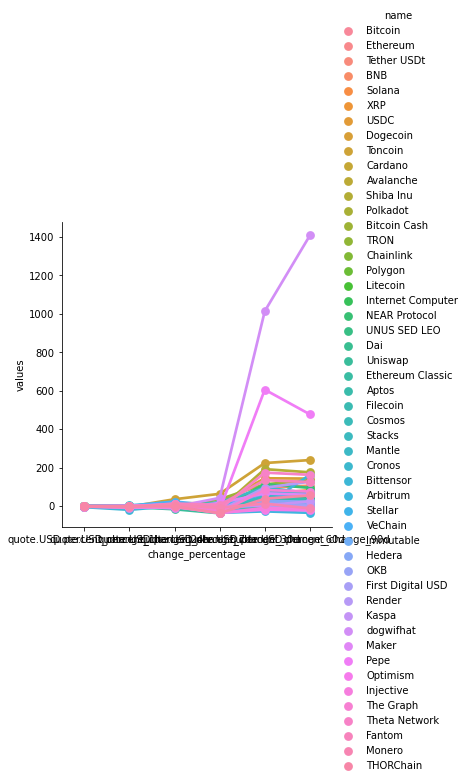

In [75]:
#creating x,y legend
sns.catplot(x='change_percentage', y='values', hue = 'name', data = dfRenamed, kind = 'point')

In [82]:
# to have a better x axis value we can replace the change_percentage name to shorter version


dfRenamed['change_percentage'] = dfRenamed['change_percentage'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24hr','7d','30d','60d','90d'])
dfRenamed



,name,change_percentage,values
0,Bitcoin,1hr,-0.94559
1,Bitcoin,24hr,-0.94474
2,Bitcoin,7d,5.21565
3,Bitcoin,30d,-3.81734
4,Bitcoin,60d,46.31369
...,...,...,...
295,THORChain,24hr,-2.34023
296,THORChain,7d,-1.82155
297,THORChain,30d,-37.68218
298,THORChain,60d,37.78377


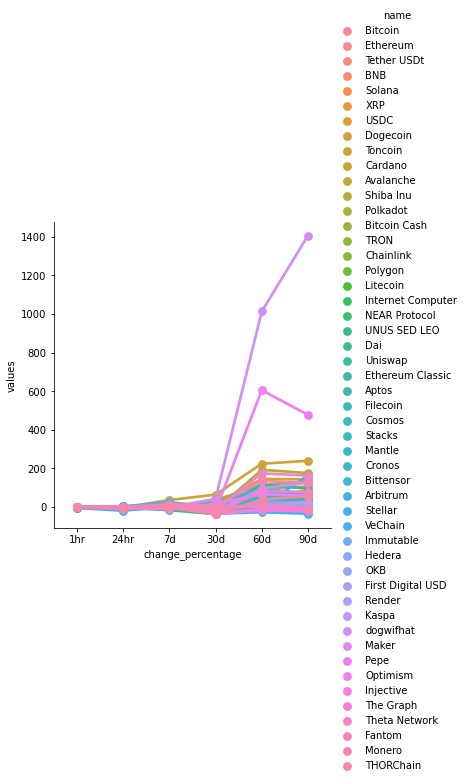

In [83]:

sns.catplot(x='change_percentage', y='values', hue = 'name', data =dfRenamed, kind = 'point')

In [84]:
# to get a more specific values, we can indicate the columns and query the name of cryto you want to pull

dfRenamed= df[['name','quote.USD.price','timestamp']]
dfCrypto = dfRenamed.query("name == 'Bitcoin'")
dfCrypto

,name,quote.USD.price,timestamp
0,Bitcoin,70496.63530,2024-04-12 13:32:32.537631


In [85]:
sns.lineplot(x='timestamp',y='qoute.USD.price', data = dfRenamed)

ValueError: Could not interpret value `qoute.USD.price` for parameter `y`